In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Introduction

Support Vector Machine (SVM) is a supervised machine learning algorithm which finds a hyperplane that separates the data into classes. The hyperplane is chosen in such a way that it maximizes the margin between the classes. However, sometimes the example data is not linear separable. In such cases, the SVM algorithm can be extended to use a kernel function to map the data into a higher-dimensional space where it can be linearly separated.  

The main goal of this notebook is to understand the SVM algorithm and how it works.

The operative objectives of this notebook are:

1. To implement the SVM algorithm using the numpy library.
2. To apply the SVM algorithm using the scikit-learn library and Sequential Minimal Optimization (SMO) algorithm on the Iris dataset.
3. To visualize the decision boundary of the SVM algorithm.

Note that this notebook does not talk about the hyperparameter optimization of the algorithm or how to choose the kernel function. 

# Mathematical Background

As mentioned above, SVM is an algorithm that finds a hyperplane that maximizes the margin between the two classes. The margin is the distance between the hyperplane and the nearest data point from either class, which is called a support vector.

## Hyperplane and Margin
The hyperplane is defined as:

$$w^Tx + b = 0$$

where $w$ is the normal vector to the hyperplane and $b$ is the bias term. The distance between the hyperplane and the data point $x$ is given by:

$$\frac{|w^Tx + b|}{||w||}$$

The margin is given by:

$$\frac{2}{||w||}$$

## Desicion Boundary

The desicion boundary is given by:

$$w^Tx + b \geq 0$$

If $w^Tx + b \geq 0$ then the data point $x$ belongs to class 1, otherwise it belongs to class 2. However, the desicion boundary is not enough to maximize the margin and might make points lie on the hyperplane. To avoid this, we introduce the constraints:

$$w^Tx_- + b \leq -1$$
$$w^Tx_+ + b \geq 1$$

where $x_-$ and $x_+$ are the nearest data points from the negative and positive classes respectively.
However, solving these two equations might be mathematically inconvenient. Fortunately, we can combine these two equations into one by defining $y_i = -1$ for the negative examples and $y_i = +1$ for the positive examples and by multiplying each constraint by $y_i$ we get:

if $y_i = -1$ then $y_i(w^Tx_i + b) \leq -1 \rightarrow y_i(w^Tx_i + b) \geq 1$ 
if $y_i = 1$ then $y_i(w^Tx_i + b) \geq 1$ remains the same.

As a result, we get $y_i(w^Tx_i + b) \geq 1$ for all examples, and we can use this combined constraint in the optimization problem for both classes.


## Optimization Problem

To find the hyperplane the maximizes the margin we can solve the following optimization problem:

$$\text{minimize} \quad \frac{1}{2}||w||^2$$

subject to the constraints:

$$y_i(w^Tx_i + b) \geq 1 \quad \text{for} \quad i = 1,2,...,l$$

where $l$ is the number of training examples. So, we have a constraint and an optimization problem thus we can use the Lagrange multipliers to solve this problem. The Lagrangian for this problem is given by:

$$L(w,b,\alpha) = \frac{1}{2}||w||^2 - \sum_{i=1}^{l}\alpha_i[y_i(w^Tx_i + b) - 1]$$

$$\alpha_i \geq 0 \quad \text{for} \quad i = 1,2,...,l$$

where $\alpha_i$ are the Lagrange multipliers. The optimization problem can be solved by taking the partial derivatives of the Lagrangian with respect to $w$ and $b$ and setting them to zero. The solution is given by:

$$\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^{l} \alpha_i y_i \mathbf{x}_i = 0$$


$$\frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^{l} \alpha_i y_i = 0$$

Thus, we get:

$$w = \sum_{i=1}^{l} \alpha_i y_i x_i$$

and

$$\sum_{i=1}^{l} \alpha_i y_i = 0$$

## Dual Form

The optimization problem can be converted into the dual form by substituting the value of $w$ back into the Lagrangian. 


$$\mathcal{L}(\alpha) = \sum_{i=1}^{l} \alpha_i - \frac{1}{2} \sum_{i=1}^{l} \sum_{j=1}^{l} \alpha_i \alpha_j y_i y_j x_i^Tx_j$$


From the dual form, we understand that the maximum margin hyperplane is a linear combination of the training examples. Namely, the maximization of the margin depends only on the dot product of $x_i$ and $x_j$. 

## Kernel SVM

When the data is not linearly separable it is possible to map it into a higher-dimensional space where it can be linearly separated. However, this mapping is computationally expensive. To avoid this, we can use the kernel trick. The kernel trick allows us to compute the dot product of the mapped data without actually mapping it. The kernel function is defined as:

$$K(x_i,x_j) = \phi(x_i)^T\phi(x_j)$$

where $\phi$ is the mapping function. The most common kernel functions are the linear kernel, polynomial kernel, and the Gaussian kernel.

Applying the kernel function to the dual form we get:

$$\mathcal{L}(\alpha) = \sum_{i=1}^{l} \alpha_i - \frac{1}{2} \sum_{i=1}^{l} \sum_{j=1}^{l} \alpha_i \alpha_j y_i y_j K(x_i,x_j)$$

## Optimization Algorithm

The optimization problem can be solved by many optimization algorithms such as: Sequential Minimal Optimization (SMO) algorithm, Gradient Descent (GD) etc. In this notebook, I will use the SVM algorithm implemeneted in the sci-kit learn library which uses the SMO algorithm.


**Note that optimization algorithms aren't covered in this notebook.** for further information about the SMO algorithm you can refer to the following paper: [Platt, John. "Sequential minimal optimization: A fast algorithm for training support vector machines."](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-98-14.pdf)

# Python Implementation

In [59]:
# load iris

iris = load_iris()
X = iris.data[:,:2]
Y = iris.target
# take only the first two classes (I solve a binary classification problem)
X = X[:100,:] 
Y = Y[:100] 
Y = np.where(Y == 0, -1, 1) # change the labels to -1 and 1

In [60]:
svm_rbf = svm.SVC(kernel='rbf', C=1.0)
svm_linear = svm.SVC(kernel='linear', C=1.0) 
svm_poly = svm.SVC(kernel='poly', C=1.0, degree=3)

## Model Training

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

svm_rbf.fit(x_train, y_train)
svm_linear.fit(x_train, y_train)
svm_poly.fit(x_train, y_train)

SVC(kernel='poly')

## Predictions

In [62]:
rbf_y_hat = svm_rbf.predict(x_test)
linear_y_hat = svm_linear.predict(x_test)
poly_y_hat = svm_poly.predict(x_test)

## Visualization

In [63]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [64]:
# title for the plots
poly_deg = svm_poly.get_params()['degree']
titles = ['Linear Kernel',
          'RBF Kernel',
          f'Polynomial ({poly_deg} degree) Kernel']

In [65]:
def PlotDecisionBoundary(svm, title):
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
    scatter0 = plt.scatter(X[Y==-1, 0], X[Y==-1, 1], c='black', label='Class 0')
    scatter1 = plt.scatter(X[Y==1, 0], X[Y==1, 1], c='red', label='Class 1')

    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

    plt.legend(handles=[scatter0, scatter1])

    plt.show()

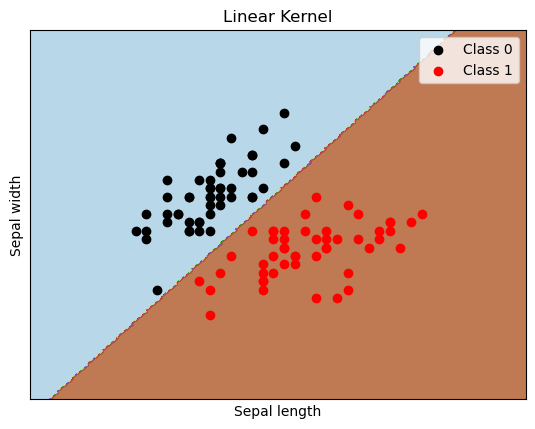

In [66]:
PlotDecisionBoundary(svm_linear, titles[0])

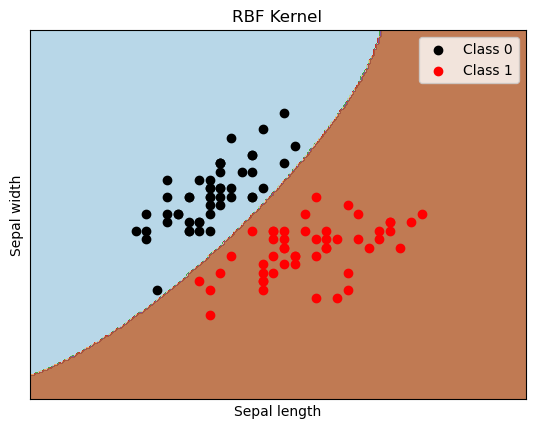

In [67]:
PlotDecisionBoundary(svm_rbf, titles[1])

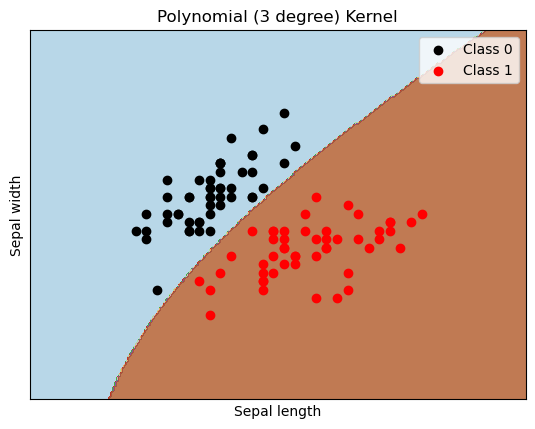

In [68]:
PlotDecisionBoundary(svm_poly, titles[2])

# Conclusion

The SVM algorithm seem to successfuly classify the Iris dataset. The decision boundary is able to separate the data into classes.

# Discussion

While the SVM algorithm seem to have managed to classify the unseen data (test data) correctly, it is important to note that the algorithm needs to be tuned. Thus, using the default hyperparameters might not be the best choice. In practice, the hyperparameters need to be optimized using tuning techniques which are not covered by this notebook. In addition, the SVM algorithm can be extended to solve multi-class classification problems which is also not covered by this notebook.

Another important point to mention is that the Iris dataset is a simple dataset which does not indicate the performance of the algorithm on complex datasets. This, it is important to test the algorithm on different datasets to understand it's limitations and advantages.

# Bibliography

Jakkula, V. (2006). Tutorial on support vector machine (svm). School of EECS, Washington State University, 37(2.5), 3.

MIT OpenCourseWare. (2014, January 10). 16. Learning: support vector machines [Video]. YouTube. https://www.youtube.com/watch?v=_PwhiWxHK8o